In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/sample_data/student-data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [5]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [6]:
data.shape

(395, 31)

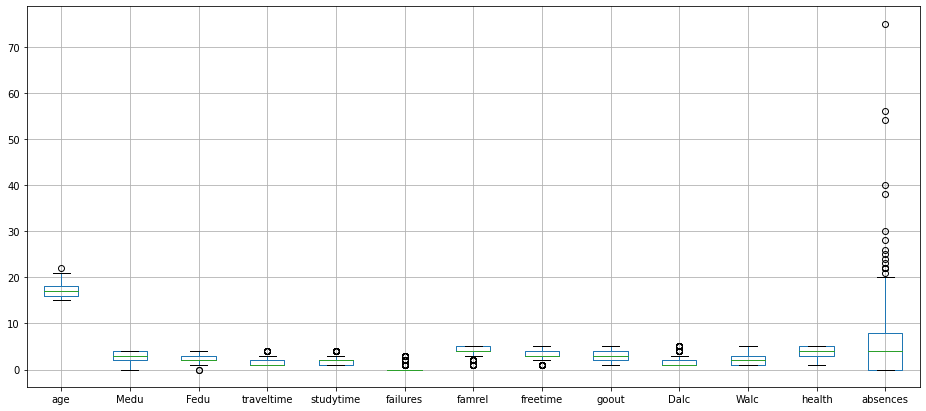

In [7]:
#checking for outliers
plt.figure(figsize=(16,7))
data.boxplot()

In [8]:
#Handling outliers in 'age'
Q1=np.percentile(data['age'],25,interpolation='midpoint')
Q2=np.percentile(data['age'],50,interpolation='midpoint')
Q3=np.percentile(data['age'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('low_lim=',low_lim)
print('up_lim=',up_lim)
outlier=[]
for x in data['age']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)
outlier

Q1= 16.0
Q2= 17.0
Q3= 18.0
low_lim= 13.0
up_lim= 21.0


[22]

In [9]:
ind_1 =data["age"]>up_lim
data.loc[ind_1].index

Int64Index([247], dtype='int64')

In [10]:
data.drop([247],inplace=True)

In [11]:
#Handling outliers in 'Fedu'
Q1=np.percentile(data['Fedu'],25,interpolation='midpoint')
Q2=np.percentile(data['Fedu'],50,interpolation='midpoint')
Q3=np.percentile(data['Fedu'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('low_lim=',low_lim)
print('up_lim=',up_lim)
outlier=[]
for x in data['Fedu']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)
outlier

Q1= 2.0
Q2= 2.0
Q3= 3.0
low_lim= 0.5
up_lim= 4.5


[0, 0]

In [12]:
ind1 =data['Fedu']<low_lim
data.loc[ind1].index

Int64Index([76, 171], dtype='int64')

In [13]:
data.drop([76, 171],inplace=True)

In [14]:
#Handling outliers in 'traveltime'
Q1=np.percentile(data['traveltime'],25,interpolation='midpoint')
Q2=np.percentile(data['traveltime'],50,interpolation='midpoint')
Q3=np.percentile(data['traveltime'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('low_lim=',low_lim)
print('up_lim=',up_lim)
outlier=[]
for x in data['traveltime']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)
outlier
ind1 =data["traveltime"]<low_lim
data.loc[ind1].index
ind2 =data["traveltime"]>up_lim
data.loc[ind2].index

Q1= 1.0
Q2= 1.0
Q3= 2.0
low_lim= -0.5
up_lim= 3.5


Int64Index([61, 108, 134, 149, 164, 228, 327, 375], dtype='int64')

In [15]:
data.drop([61, 108, 134, 149, 164, 228, 327, 375],inplace=True)

In [16]:
#Handling outliers in 'studytime'
Q1=np.percentile(data['studytime'],25,interpolation='midpoint')
Q2=np.percentile(data['studytime'],50,interpolation='midpoint')
Q3=np.percentile(data['studytime'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('low_lim=',low_lim)
print('up_lim=',up_lim)
outlier=[]
for x in data['studytime']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)
outlier
ind1 =data["studytime"]<low_lim
data.loc[ind1].index
ind2 =data["studytime"]>up_lim
data.loc[ind2].index

Q1= 1.0
Q2= 2.0
Q3= 2.0
low_lim= -0.5
up_lim= 3.5


Int64Index([ 47,  66,  67,  69,  70,  71,  77,  94,  95, 105, 106, 121, 140,
            204, 210, 256, 259, 271, 282, 293, 298, 303, 330, 334, 338],
           dtype='int64')

In [17]:
data.drop([47,  66,  67,  69,  70,  71,  77,  94,  95, 105, 106, 121, 140,204, 210, 256, 259, 271, 282, 293, 298, 303, 330, 334, 338],inplace=True)

In [18]:
#Handling outliers in 'failures'
Q1=np.percentile(data['failures'],25,interpolation='midpoint')
Q2=np.percentile(data['failures'],50,interpolation='midpoint')
Q3=np.percentile(data['failures'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('low_lim=',low_lim)
print('up_lim=',up_lim)
outlier=[]
for x in data['failures']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)
outlier
ind1 =data["failures"]<low_lim
data.loc[ind1].index
ind2 =data["failures"]>up_lim
data.loc[ind2].index

Q1= 0.0
Q2= 0.0
Q3= 0.0
low_lim= 0.0
up_lim= 0.0


Int64Index([  2,  18,  25,  40,  44,  49,  52,  72,  78,  85,  88, 111, 112,
            118, 127, 128, 130, 137, 138, 141, 144, 146, 150, 151, 152, 153,
            157, 159, 160, 161, 162, 165, 170, 173, 198, 205, 206, 213, 216,
            217, 221, 225, 239, 248, 250, 252, 255, 270, 278, 281, 292, 304,
            305, 307, 308, 309, 310, 312, 313, 314, 315, 336, 340, 341, 343,
            349, 350, 352, 353, 361, 367, 370, 376, 383, 384, 387, 389, 390,
            392],
           dtype='int64')

In [19]:
data.drop([2,  18,  25,  40,  44,  49,  52,  72,  78,  85,  88, 111, 112, 118, 127, 128, 130, 137, 138, 141, 144, 146, 150, 151, 152, 153,157, 159, 160, 161, 162, 165, 170, 173, 198, 205, 206, 213, 216, 217, 221, 225, 239, 248, 250, 252, 255, 270, 278, 281, 292, 304,305, 307, 308, 309, 310, 312, 313, 314, 315, 336, 340, 341, 343,349, 350, 352, 353, 361, 367, 370, 376, 383, 384, 387, 389, 390,392],inplace=True)

In [20]:
#Handling outliers in 'famrel'
Q1=np.percentile(data['famrel'],25,interpolation='midpoint')
Q2=np.percentile(data['famrel'],50,interpolation='midpoint')
Q3=np.percentile(data['famrel'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('low_lim=',low_lim)
print('up_lim=',up_lim)
outlier=[]
for x in data['famrel']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)
outlier

Q1= 4.0
Q2= 4.0
Q3= 5.0
low_lim= 2.5
up_lim= 6.5


[2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2]

In [21]:
ind1 =data["famrel"]<low_lim
data.loc[ind1].index

Int64Index([27, 37, 46, 60, 79, 156, 184, 207, 222, 238, 240, 296, 299, 357,
            363, 391],
           dtype='int64')

In [22]:
data.drop([27, 37, 46, 60, 79, 156, 184, 207, 222, 238, 240, 296, 299, 357,363, 391],inplace=True)

In [23]:
#Handling outliers in 'freetime'
Q1=np.percentile(data['freetime'],25,interpolation='midpoint')
Q2=np.percentile(data['freetime'],50,interpolation='midpoint')
Q3=np.percentile(data['freetime'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('low_lim=',low_lim)
print('up_lim=',up_lim)
outlier=[]
for x in data['freetime']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)
outlier

Q1= 3.0
Q2= 3.0
Q3= 4.0
low_lim= 1.5
up_lim= 5.5


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [24]:
ind1 =data["freetime"]<low_lim
data.loc[ind1].index

Int64Index([7, 19, 68, 89, 168, 189, 260, 276, 301, 378], dtype='int64')

In [25]:
data.drop([7, 19, 68, 89, 168, 189, 260, 276, 301, 378],inplace=True)

In [26]:
#Handling outliers in 'Dalc'
Q1=np.percentile(data['Dalc'],25,interpolation='midpoint')
Q2=np.percentile(data['Dalc'],50,interpolation='midpoint')
Q3=np.percentile(data['Dalc'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('low_lim=',low_lim)
print('up_lim=',up_lim)
outlier=[]
for x in data['Dalc']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)
outlier

Q1= 1.0
Q2= 1.0
Q3= 2.0
low_lim= -0.5
up_lim= 3.5


[5, 4, 5, 4, 4, 4, 5, 5, 4]

In [27]:
ind1 =data["Dalc"]>up_lim
data.loc[ind1].index

Int64Index([29, 54, 100, 175, 192, 211, 223, 236, 369], dtype='int64')

In [28]:
data.drop([29, 54, 100, 175, 192, 211, 223, 236, 369],inplace=True)

In [29]:
#Handling outliers in 'absences'
Q1=np.percentile(data['absences'],25,interpolation='midpoint')
Q2=np.percentile(data['absences'],50,interpolation='midpoint')
Q3=np.percentile(data['absences'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('low_lim=',low_lim)
print('up_lim=',up_lim)
outlier=[]
for x in data['absences']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)
outlier

Q1= 0.0
Q2= 2.0
Q3= 6.0
low_lim= -9.0
up_lim= 15.0


[54, 26, 18, 16, 56, 18, 18, 20, 22, 30, 20, 23, 16, 17]

In [30]:
ind1 =data["absences"]>up_lim
data.loc[ind1].index

Int64Index([74, 103, 123, 133, 183, 203, 234, 237, 277, 280, 311, 320, 335,
            379],
           dtype='int64')

In [31]:
data.drop([74, 103, 123, 133, 183, 203, 234, 237, 277, 280, 311, 320, 335,379],inplace=True)

Now all the outliers are removed


In [32]:
data.shape

(231, 31)

In [33]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["passed"] = le.fit_transform(data["passed"])

In [35]:
data['time']=data['freetime']+data['goout']

In [36]:
data['alc_con']=data['Dalc']+data['Walc']

In [37]:
data=data.drop(['freetime','goout','Dalc','Walc'],axis=1)

In [38]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'health', 'absences',
       'passed', 'time', 'alc_con'],
      dtype='object')

In [39]:
y=data['passed']

In [40]:
x=data.drop(['school','sex','guardian','nursery','reason'],axis=1)

In [41]:
address_new =pd.get_dummies(x["address"])
famsize_new =pd.get_dummies(x["famsize"])
x=pd.concat([x,address_new,famsize_new],axis=1)

In [42]:
x = x.drop(["address","famsize"],axis=1)

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x["Mjob"] = le.fit_transform(x["Mjob"])
x["Fjob"] = le.fit_transform(x["Fjob"])

In [44]:
pstatus_new =pd.get_dummies(x["Pstatus"])
ssup_new =pd.get_dummies(x["schoolsup"])
x=pd.concat([x,pstatus_new,ssup_new],axis=1)
x = x.drop(["Pstatus","schoolsup"],axis=1)

In [45]:
fsup_new =pd.get_dummies(x["famsup"])
paid_new =pd.get_dummies(x["paid"])
x=pd.concat([x,fsup_new,paid_new],axis=1)
x = x.drop(["famsup","paid"],axis=1)

In [46]:
act_new =pd.get_dummies(x["activities"])
higher_new =pd.get_dummies(x["higher"])
x=pd.concat([x,act_new,higher_new],axis=1)
x = x.drop(["activities","higher"],axis=1)

In [47]:
int_new =pd.get_dummies(x["internet"])
rom_new=pd.get_dummies(x["romantic"])
x=pd.concat([x,int_new,rom_new],axis=1)
x = x.drop(["internet","romantic"],axis=1)

In [48]:
x.columns

Index(['age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'studytime',
       'failures', 'famrel', 'health', 'absences', 'passed', 'time', 'alc_con',
       'R', 'U', 'GT3', 'LE3', 'A', 'T', 'no', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes'],
      dtype='object')

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred =logit_model.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is :",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred))
print("Recall is :",recall_score(y_test,y_pred))
print("f1 score is :",f1_score(y_test,y_pred))
print("confusion matrix ",confusion_matrix(y_test,y_pred))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
f1 score is : 1.0
confusion matrix  [[16  0]
 [ 0 42]]


Our Logistic Regression model is perfect.